# Aprendizaje automatico en PYME's
* Andrés Castaño - 1001326818
* Julián Flórez - 1015471333

##Introducción


Dados los avances tecnológicos que se presentan continuamente y acorde al impacto que tienen, las grandes empresas que lideran a nivel nacional e internacional constantemente hacen nuevas implementaciones y se encuentran muy cercanos a las soluciones que la tecnología puede ofrecer: mejoras en producción, logística y desempeño tanto interno como para sus clientes. Estas tecnologías, aunque de código abierto, no son tan accesibles por todos, puesto que la inversión necesaria para llegar a una implementación muchas veces no es vista necesaria, o importante dentro de industrias mas tradicionales. Gracias a esto se genera una brecha tecnológica y muchas veces un factor negativo en las capacidades de la empresa.

Es de saber el impacto que tiene el uso adecuado de la información en las empresas, esto permite obtener una gran visión de lo que sucede en cada proceso y observar los detalles que pueden estar envueltos en una determinada situación. Este proceso es novedoso e implica solidos sistemas de información que contemplen un adecuado mantenimiento y soporte. Además de modelos de datos que permitan relacionar e interpretar correctamente la información. 

Con esto, se contemplan las posibilidades que tiene una Pequeña Y Mediana Empresa (PYME) pueda acceder a estas tecnologías, y que ventajas les puede ofrecer en entornos en donde no es común su uso. Para este proyecto utilizaremos una pequeña empresa dedicada a la venta y distribución de materiales de construcción ubicada en el norte de Bogotá.


##Planteamiento del Problema

Como en cualquier industria, la forma mas común de dirigir un negocio es a partir de la experiencia. Conocer los comportamientos dada una situación, un contexto o una época del año. Este procedimiento, pospandemia ha afectado directamente a nuestra empresa objetivo. El comportamiento según la compra de los clientes ha tenido una seria variación en aspectos como la epoca del año, la cantidad, la marca y calidad de los productos, entre otros. Por esto, la toma de decisiones en las compras a realizar ha generado dudas. Productos estancados, marcas que han bajado la calidad, productos que se mueven pero no dinámicamente y un largo etc.

Distintos casos que se resumen en malas decisiones en las compras de los productos. Esto se puede solucionar revisando las ventas, entendiendo su comportamiento y como puede llegar a evolucionar en el tiempo. Permitiendo ver la tendencia de ciertos productos y promoviendolos a los clientes.

## Descripción de los datos

La información que veremos para esta primera entrega, contempla datos entre los años 2018 y 2022.  

Fue brindado por medio de un archivo Excel un informe con la información que veremos a continuación:

###Esta es la informacion proporcionada. 
###Vemos que inicialmente es una especie de reporte, en donde obtenemos:
###Fecha, Cliente, Producto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
data = pd.read_excel('/content/gdrive/MyDrive/ventas.xlsx', parse_dates=["FechaVenta"])
data

,IdFactura,CodProducto,FechaVenta,Mes,Año,HoraVenta,IdCliente,NomApeCiudCli,Ciudad,NomApeEmp,...,CategoriaProducto,Cantidad,PrecioDet,IvaDet,DescuentoDet,VlrIva,VlrDescuento,VlrAPagar,PrecioCompraDet,Utilidad
0,24075,12182,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,TORNILLERIA,400.0,160,0,0,0.000000,0,64000.0,112,19200.000000
1,24075,12159,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,PINTURAS,1.0,5000,0,0,0.000000,0,5000.0,2988,2012.000000
2,24075,12167,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,DRYWALL,4.0,4700,0,0,0.000000,0,18800.0,4000,2800.000000
3,24075,12468,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,PLOMERIA,2.0,7000,0,0,0.000000,0,14000.0,4875,4250.000000
4,24075,10898,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,TUBERIA PRESION,3.0,800,16,0,331.034483,0,2400.0,398,874.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105318,63084,10850,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,TUBERIA PRESION,1.0,700,16,0,96.551724,0,700.0,376,227.448276
105319,63084,11632,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,ELECTRICOS,1.0,3000,16,0,413.793103,0,3000.0,2200,386.206897
105320,63084,10363,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,PLOMERIA,1.0,19500,16,0,2689.655172,0,19500.0,14093,2717.344828
105321,63085,9774,2022-12-31 12:13:56,diciembre,2022,12:13:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,CINTAS,1.0,1000,16,0,137.931034,0,1000.0,583,279.068966


###Observamos la totalidad de las columnas

In [3]:
data.columns

Index(['IdFactura', 'CodProducto', 'FechaVenta', 'Mes', 'Año', 'HoraVenta',
       'IdCliente', 'NomApeCiudCli', 'Ciudad', 'NomApeEmp', 'FormaPago',
       'NomProducto', 'ProductoMarca', 'NomMarca', 'Unidad',
       'CategoriaProducto', 'Cantidad', 'PrecioDet', 'IvaDet', 'DescuentoDet',
       'VlrIva', 'VlrDescuento', 'VlrAPagar', 'PrecioCompraDet', 'Utilidad'],
      dtype='object')

### Eliminamos aquellas que no son necesarias o que no aportan ningun valor
#### Ciudad: Todas son de Bogotá
#### Ademas de tener valores sin sentido como otras ciudades

In [4]:
data['Ciudad'].unique()

array(['Bogota', 'Pereira', 'Barranquilla', 'Barrancabermeja'],
      dtype=object)

#### Empleado: Solo hay regitrado uno

In [5]:
data['NomApeEmp'].unique()

array(['PAOLA RUBIANO'], dtype=object)

####Forma de Pago: No es usado el campo, aun cuando hay otros medios de pago

In [6]:
data['FormaPago'].unique()

array(['EFECTIVO', 'Debito (Tarjeta)'], dtype=object)

#### Unidad: La unidad en la que se vende el producto (Kg, galon, botella, etc)
#### No se ve una mayor importancia

In [7]:
data['Unidad'].unique()

array(['UND', 'CANECA', nan, 'GALON', 'ROLLO', 'PAR', 'BOTELLA', 'METROS',
       'CUARTO', 'CAJA', 'BALDE', 'METRO', 'OCTAVO', 'BULTO', 'TUBO'],
      dtype=object)

#### Iva: No consideramos que ofrezca ningun valor
#### Descuento: El campo es algunas veces usado, otras se cambia directamente el precio, puede estar sesgado
#### Marca: Hay muchos vacios

In [8]:
data['NomMarca'].isnull().sum()

58238

In [9]:
data['Anio'] = data.Año.astype(int)

data


,IdFactura,CodProducto,FechaVenta,Mes,Año,HoraVenta,IdCliente,NomApeCiudCli,Ciudad,NomApeEmp,...,Cantidad,PrecioDet,IvaDet,DescuentoDet,VlrIva,VlrDescuento,VlrAPagar,PrecioCompraDet,Utilidad,Anio
0,24075,12182,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,400.0,160,0,0,0.000000,0,64000.0,112,19200.000000,2018
1,24075,12159,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,1.0,5000,0,0,0.000000,0,5000.0,2988,2012.000000,2018
2,24075,12167,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,4.0,4700,0,0,0.000000,0,18800.0,4000,2800.000000,2018
3,24075,12468,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,2.0,7000,0,0,0.000000,0,14000.0,4875,4250.000000,2018
4,24075,10898,2018-01-03 00:00:00,enero,2018,NaN,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),Bogota,PAOLA RUBIANO,...,3.0,800,16,0,331.034483,0,2400.0,398,874.965517,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105318,63084,10850,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,1.0,700,16,0,96.551724,0,700.0,376,227.448276,2022
105319,63084,11632,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,1.0,3000,16,0,413.793103,0,3000.0,2200,386.206897,2022
105320,63084,10363,2022-12-31 12:09:56,diciembre,2022,12:09:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,1.0,19500,16,0,2689.655172,0,19500.0,14093,2717.344828,2022
105321,63085,9774,2022-12-31 12:13:56,diciembre,2022,12:13:56 p.m.,5,PUBLICO GENERAL ( Bogota),Bogota,PAOLA RUBIANO,...,1.0,1000,16,0,137.931034,0,1000.0,583,279.068966,2022


In [10]:
data = data.drop(['Ciudad', 'NomApeEmp', 'FormaPago', 'Unidad','IvaDet', 'DescuentoDet', 'NomMarca', 'Utilidad','Año', 
       'VlrIva', 'VlrDescuento','ProductoMarca','HoraVenta'], axis=1)
data

,IdFactura,CodProducto,FechaVenta,Mes,IdCliente,NomApeCiudCli,NomProducto,CategoriaProducto,Cantidad,PrecioDet,VlrAPagar,PrecioCompraDet,Anio
0,24075,12182,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TORNILLO 10 X 1/2,TORNILLERIA,400.0,160,64000.0,112,2018
1,24075,12159,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),"RODILLO FELPA 9"" ECO zapote",PINTURAS,1.0,5000,5000.0,2988,2018
2,24075,12167,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),DILATADOR EN Z,DRYWALL,4.0,4700,18800.0,4000,2018
3,24075,12468,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),FLOTADOR HELBERT 1/2 COMPLETO,PLOMERIA,2.0,7000,14000.0,4875,2018
4,24075,10898,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TEE SCHEDULE PVC 1/2,TUBERIA PRESION,3.0,800,2400.0,398,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105318,63084,10850,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),TAPON ROSCADO PVC 1/2,TUBERIA PRESION,1.0,700,700.0,376,2022
105319,63084,11632,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),PRENSA ESTOPA 1/2 PVC,ELECTRICOS,1.0,3000,3000.0,2200,2022
105320,63084,10363,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),VASTAGO CORRIENTE DUCHA,PLOMERIA,1.0,19500,19500.0,14093,2022
105321,63085,9774,2022-12-31 12:13:56,diciembre,5,PUBLICO GENERAL ( Bogota),CINTA TEFLON PEQUEÑO,CINTAS,1.0,1000,1000.0,583,2022


In [11]:
data.shape

(105323, 13)

#### Las categorias que parecen estar bien, a excepcion de algunos faltantes

In [12]:
for i in data['CategoriaProducto'].unique():
  print(i)
data['CategoriaProducto'].unique().shape

TORNILLERIA
PINTURAS
DRYWALL
PLOMERIA
TUBERIA PRESION
nan
LIJAS
SIKA
ASEO
HERRAMIENTAS
TUBERIA SANITARIA
FERRETERIA
ELECTRICOS
TUBERIA ELECTRICA
REJILLAS
HIERROS
CINTAS
CONSTRUCCION
ARENAS
TELAS, PLASTICO Y CARTON
TUBERIA CPVC
TUBERIA VENTILACION
NO DEFINIDO
MADERAS
WINNES
GALVANIZADOS
TEJAS
TUBERIA COBRE
P.V.C
PVC PRESION
TOXEMENT
MALLAS


(32,)

In [13]:
data['CategoriaProducto'].isna().sum()

1411

#### El rango de fechas: de 2018 a 2022

In [14]:
data['FechaVenta'].min(), data['FechaVenta'].max()

(Timestamp('2018-01-03 00:00:00'), Timestamp('2022-12-31 12:13:56'))

#### vemos que la cardinalidad del nombre del producto es muy alta
#### Y la podemos reducir

In [15]:
data.NomProducto.unique().shape

(2901,)

#### De esta forma contamos con tan solo el 20% de los datos anteriores
#### Aunque perdiendo informacion puede llegar a ser de utilidad

In [16]:
data.NomProducto.str.split().str.get(0)

0          TORNILLO
1           RODILLO
2         DILATADOR
3          FLOTADOR
4               TEE
            ...    
105318        TAPON
105319       PRENSA
105320      VASTAGO
105321        CINTA
105322       ACOPLE
Name: NomProducto, Length: 105323, dtype: object

In [17]:
data.NomProducto.str.split().str.get(0).unique().shape

(524,)

In [18]:
data['Producto'] = data.NomProducto.str.split().str.get(0)
data = data.drop('NomProducto', axis=1)
data

,IdFactura,CodProducto,FechaVenta,Mes,IdCliente,NomApeCiudCli,CategoriaProducto,Cantidad,PrecioDet,VlrAPagar,PrecioCompraDet,Anio,Producto
0,24075,12182,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TORNILLERIA,400.0,160,64000.0,112,2018,TORNILLO
1,24075,12159,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),PINTURAS,1.0,5000,5000.0,2988,2018,RODILLO
2,24075,12167,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),DRYWALL,4.0,4700,18800.0,4000,2018,DILATADOR
3,24075,12468,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),PLOMERIA,2.0,7000,14000.0,4875,2018,FLOTADOR
4,24075,10898,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TUBERIA PRESION,3.0,800,2400.0,398,2018,TEE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105318,63084,10850,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),TUBERIA PRESION,1.0,700,700.0,376,2022,TAPON
105319,63084,11632,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),ELECTRICOS,1.0,3000,3000.0,2200,2022,PRENSA
105320,63084,10363,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),PLOMERIA,1.0,19500,19500.0,14093,2022,VASTAGO
105321,63085,9774,2022-12-31 12:13:56,diciembre,5,PUBLICO GENERAL ( Bogota),CINTAS,1.0,1000,1000.0,583,2022,CINTA


#### No podemos inferir una correlacion directa entre las variables

<ipython-input-19-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

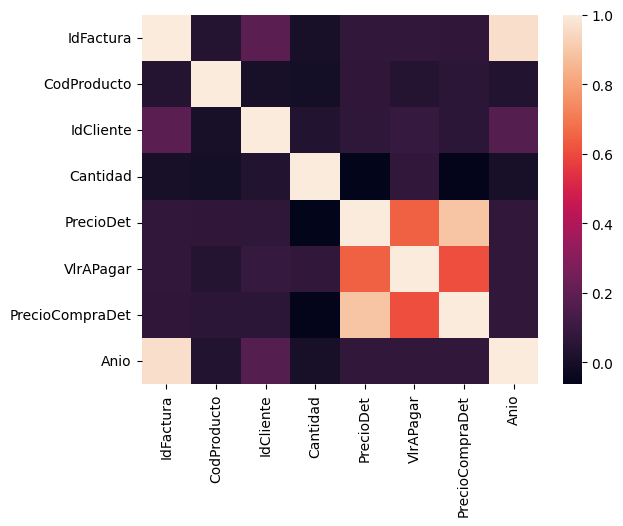

In [19]:
sns.heatmap(data.corr())

*De primera mano no podemos ver una relación directa entre las variables. Teniendo en cuenta que es un acercamiento a la informacion podemos inferir que es posible analizar si un cliente esta atado a una categoria de productos('Cliente', 'Producto', 'categoria'), si un producto se puede vender mas o menos en una epoca del año, impactando en la cantidad de producto que se compra ('fecha', 'Producto', 'Cantidad'), Podemos inferir segun las compras, si un producto tiende a ser acompañado por otro ('IdFactura', 'Producto')*

De esta forma podemos ofertar previamente algunos modelos para implementar soluciones

##Propuesta de solución

Acorde con la información presentada en este Notebook, es prematuro poder indicar un modelo puntual que nos funcione para realizar las predicciones y que se comporte de la manera esperada cuando con regularidad la cantidad de características es mayor. Sin embargo, las propuestas estudiadas fueron:








*   **Pronosticar tendencias de ventas de productos:**

Este proceso requiere una gran cantidad de información a lo largo de los años, y aunque tengamos solamente algunos, la cantidad de ventas por año puede llegar a ser representativo y obtener una precisión aceptable.
Esto es posible hacer lo con series de tiempo. "They analyze historical data to identify patterns and trends and use that information to predict future values."(Hrvoje Smolic, 2022)

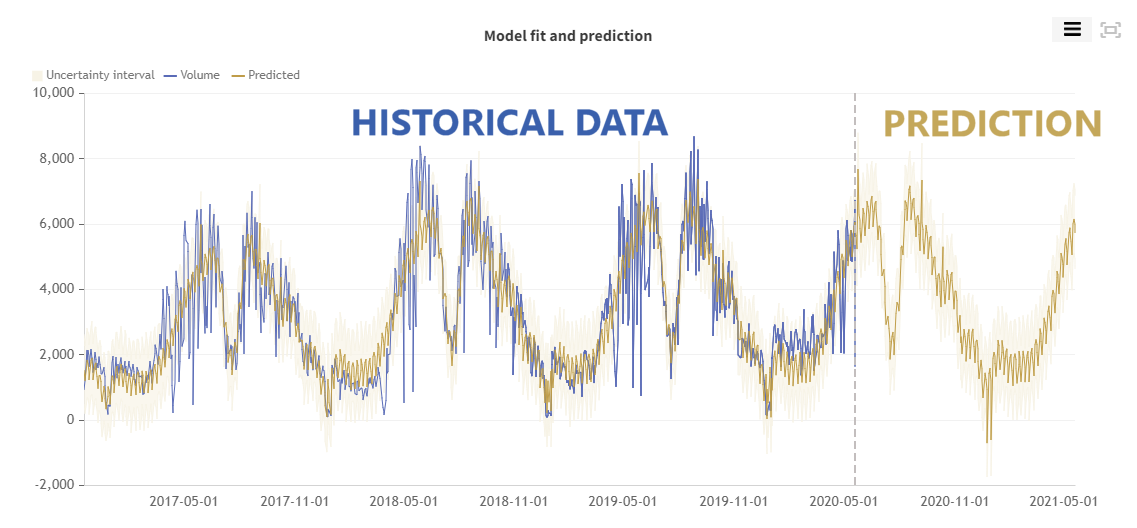


Podemos implementar diferentes enfoques utilizando series de tiempo, como nos muestra (Bohdan M., 2019)

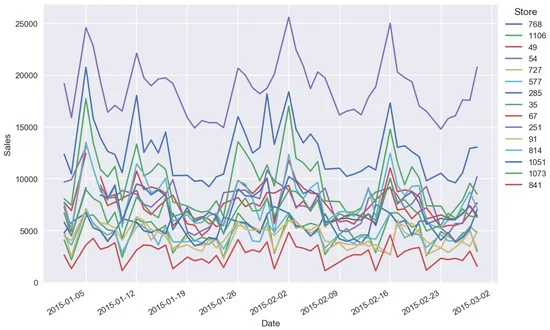



*   ****

*   **Agrupación de Clientes:**

Aunque la información de cada cliente es escaza, para su agrupación tenemos las series de compras que han realizado a través de los años y de esta forma obtener una especie de perfil en donde encaje. De esta forma comprender que tipo de productos se pueden recomendar. Es posible hacer una clasificacion que nos permita conocer que tipos de clientes tenemos basados en sus compras o en su comportamiento segun sus compras. Hacer un seguimiento y cononcer que otra calidad de productos podemos visualizar.
*   ****
*  **Agrupación de productos:**

Así como hay una tendencia que un cliente compre un grupo de productos, es posible encontrar que un producto este directamente relacionado con otro, y esto se vea reflejado en las ventas, en donde facturas con mas de un producto, nos podrían ser de ayuda. Podemos usar modelos de clasifiación que nos permitan conocer las categorias de los productos y como estos pueden estar relacionados. "Can be used to categorize the products sold by different retailers in the same categories" (Ajitesh K., 2022)


# Vamos a proceder a aplicar el modelo de series de tiempo con el fin de probar si es posible obtener un modelo funcional

#### Agregamos las columnas respectivas de tiempo al dataset

In [20]:
data['year'] = data['FechaVenta'].dt.year
data['month'] = data['FechaVenta'].dt.month
data['weekday'] = data['FechaVenta'].dt.weekday
data['hour'] = data['FechaVenta'].dt.hour
data['date'] = data['FechaVenta'].dt.date
data

,IdFactura,CodProducto,FechaVenta,Mes,IdCliente,NomApeCiudCli,CategoriaProducto,Cantidad,PrecioDet,VlrAPagar,PrecioCompraDet,Anio,Producto,year,month,weekday,hour,date
0,24075,12182,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TORNILLERIA,400.0,160,64000.0,112,2018,TORNILLO,2018,1,2,0,2018-01-03
1,24075,12159,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),PINTURAS,1.0,5000,5000.0,2988,2018,RODILLO,2018,1,2,0,2018-01-03
2,24075,12167,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),DRYWALL,4.0,4700,18800.0,4000,2018,DILATADOR,2018,1,2,0,2018-01-03
3,24075,12468,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),PLOMERIA,2.0,7000,14000.0,4875,2018,FLOTADOR,2018,1,2,0,2018-01-03
4,24075,10898,2018-01-03 00:00:00,enero,859,DESIGN & CO SAS C. CTO TAKAMI ( Bogota),TUBERIA PRESION,3.0,800,2400.0,398,2018,TEE,2018,1,2,0,2018-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105318,63084,10850,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),TUBERIA PRESION,1.0,700,700.0,376,2022,TAPON,2022,12,5,12,2022-12-31
105319,63084,11632,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),ELECTRICOS,1.0,3000,3000.0,2200,2022,PRENSA,2022,12,5,12,2022-12-31
105320,63084,10363,2022-12-31 12:09:56,diciembre,5,PUBLICO GENERAL ( Bogota),PLOMERIA,1.0,19500,19500.0,14093,2022,VASTAGO,2022,12,5,12,2022-12-31
105321,63085,9774,2022-12-31 12:13:56,diciembre,5,PUBLICO GENERAL ( Bogota),CINTAS,1.0,1000,1000.0,583,2022,CINTA,2022,12,5,12,2022-12-31


#### Podemos ver que los dias de mayor recaudación son los martes y miercoles

<Axes: xlabel='weekday'>

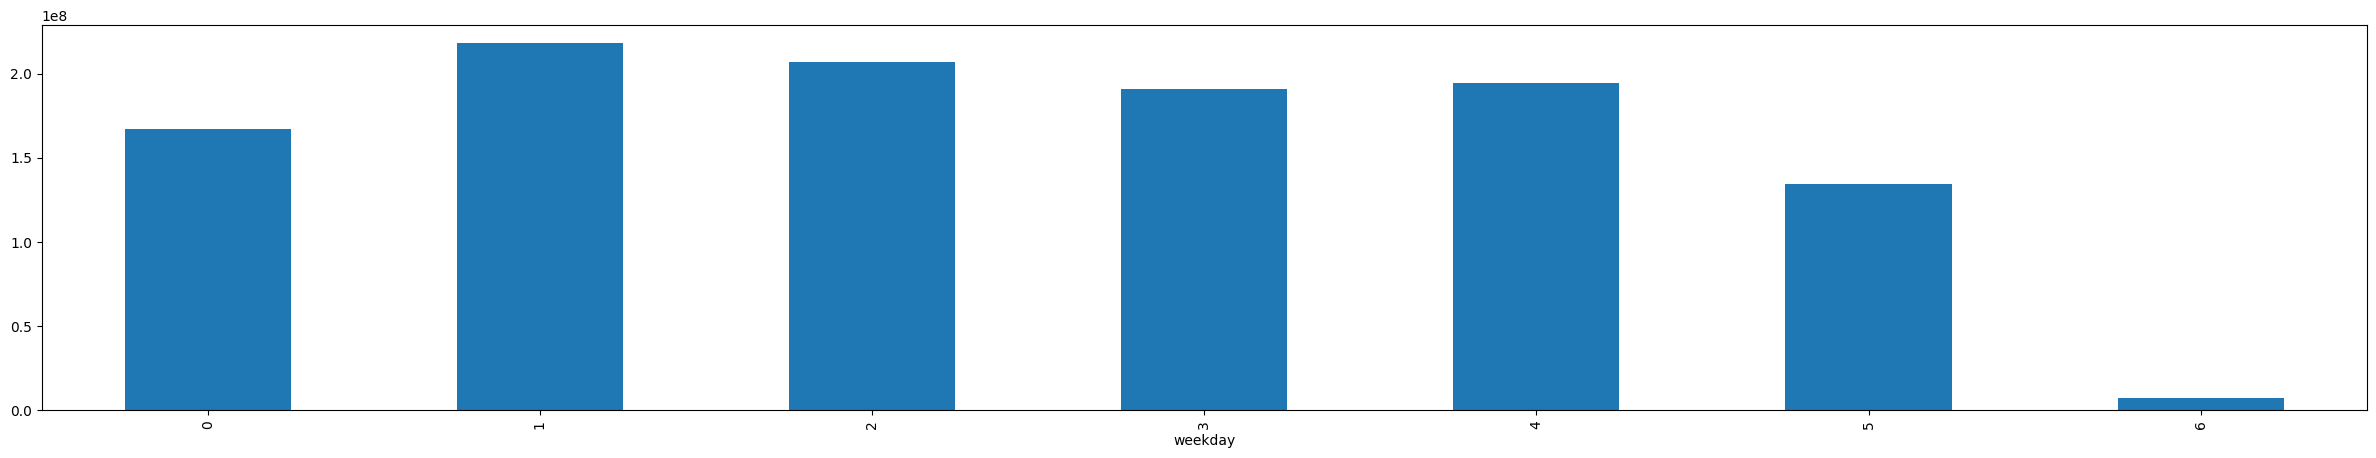

In [21]:
plt.figure(figsize=(30, 5))
data.groupby(["weekday"])['VlrAPagar'].sum().plot.bar()

#### Vemos el comportamiento por meses de las ventas, viendo aquellos picos por pandemia y restricciones

<Axes: xlabel='year,month'>

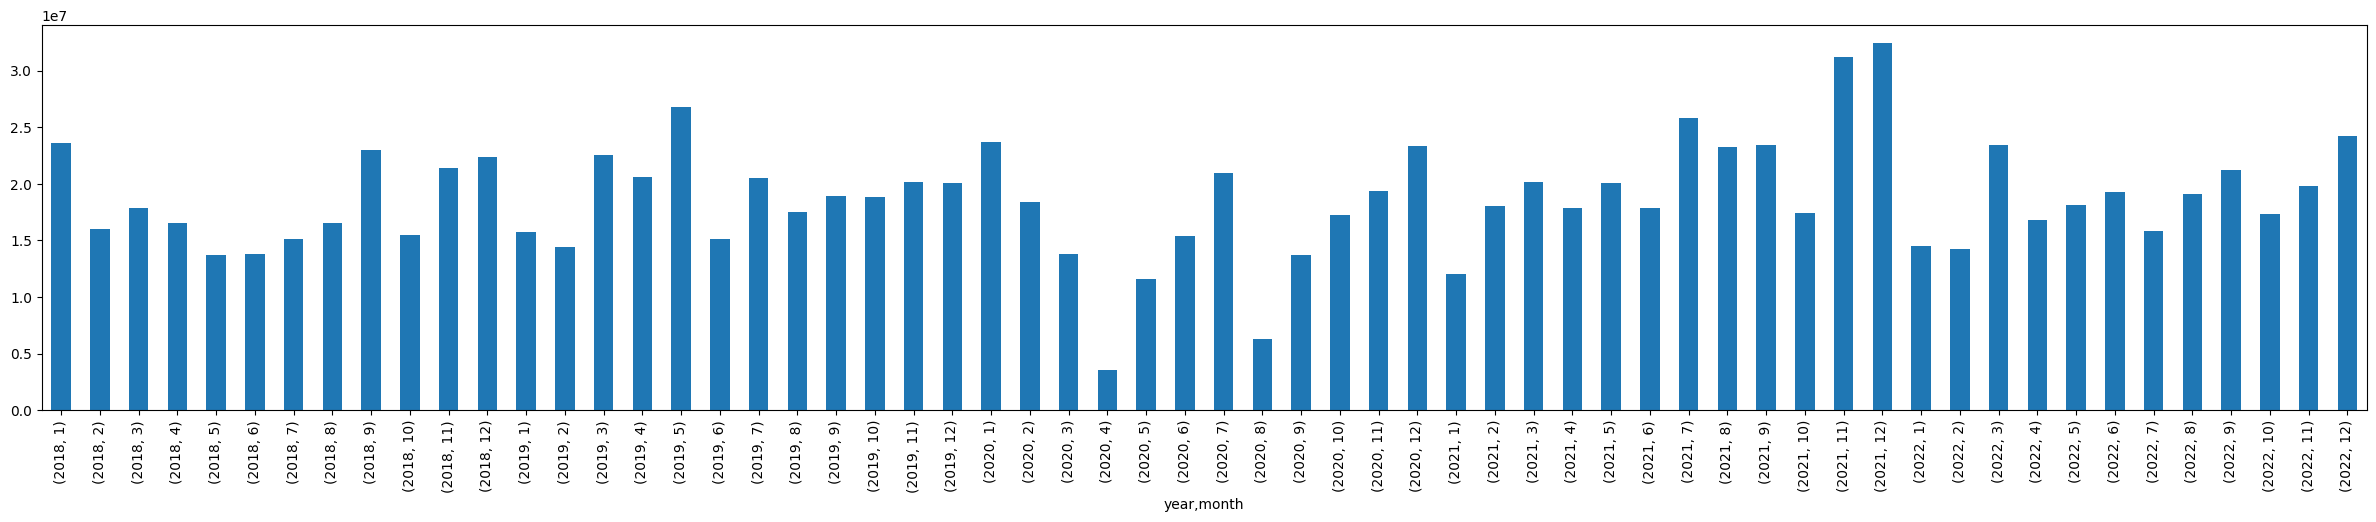

In [22]:
plt.figure(figsize=(30, 5))
data.groupby(["year", "month"])['VlrAPagar'].sum().plot.bar()

<Axes: >

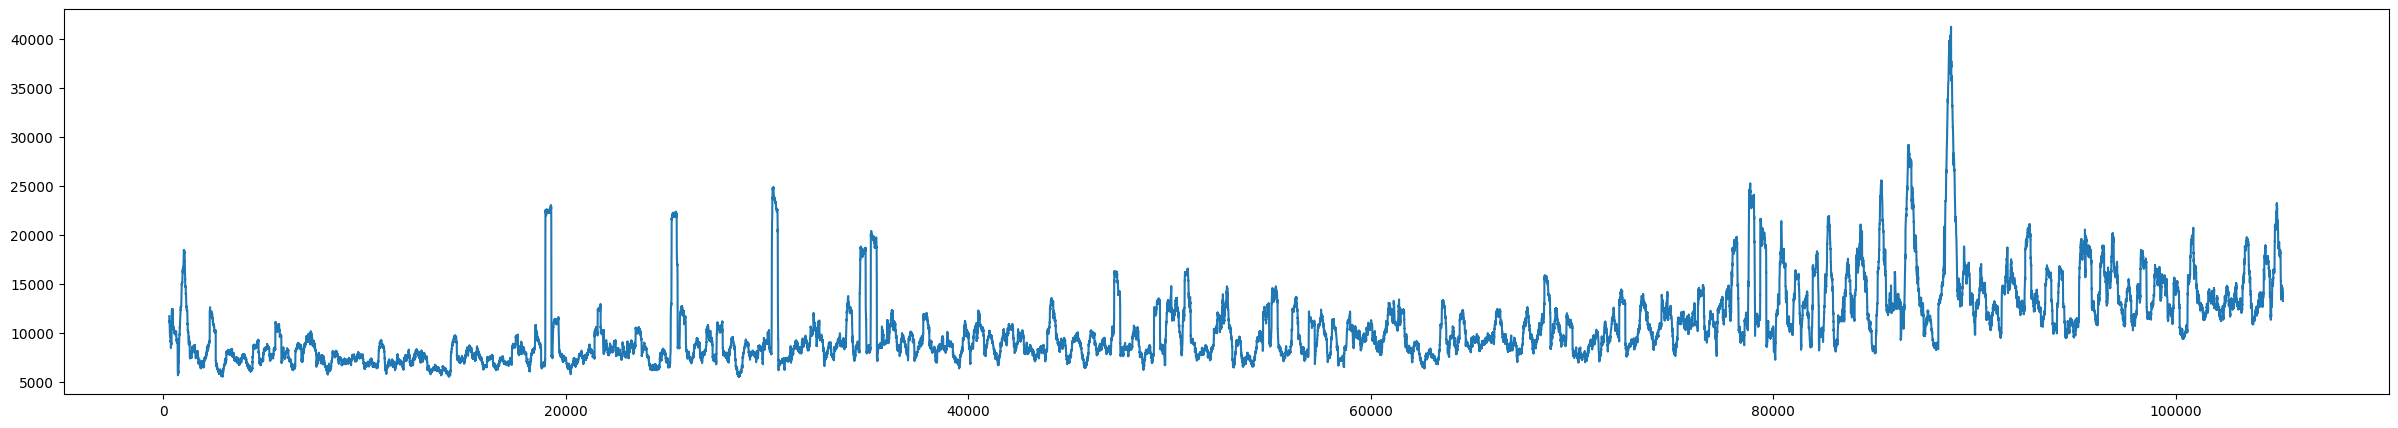

In [23]:
# Media movil
plt.figure(figsize=(30, 5))
data["VlrAPagar"].rolling(300).mean().plot()

#### Aqui vemos las la suma del valor total vendido por hora

<Axes: xlabel='hour'>

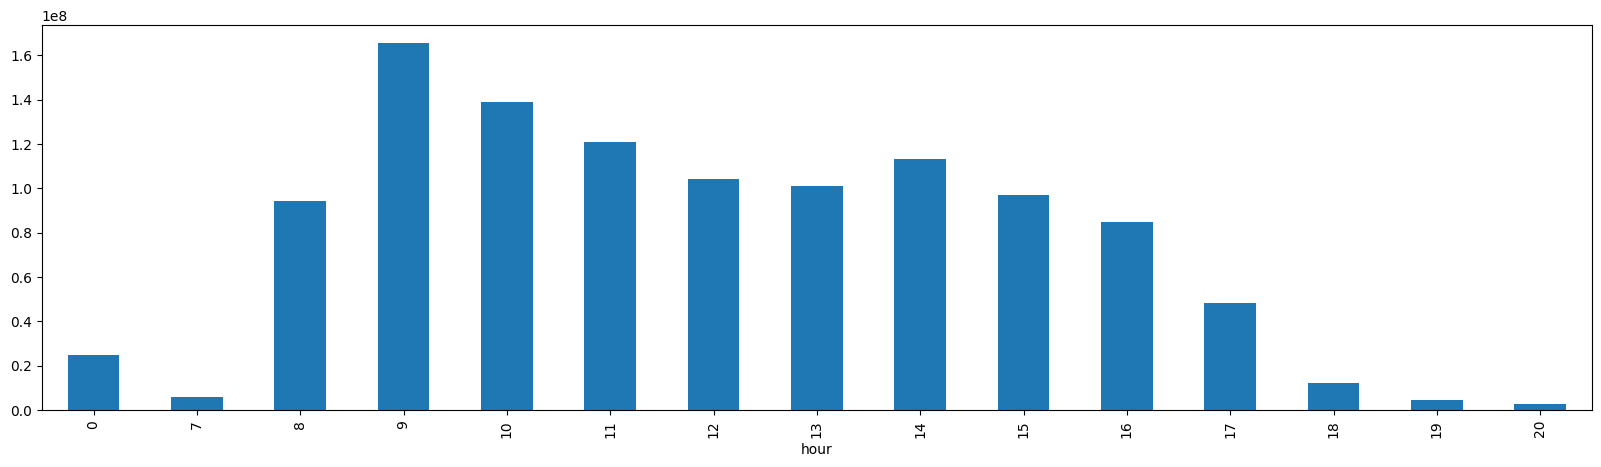

In [24]:
plt.figure(figsize=(20, 5))
data.groupby(["hour"])['VlrAPagar'].sum().plot.bar()

#### Aqui vemos la suma del valor total por meses, siendo Noviembre y diciembre los mas altos

<Axes: xlabel='month'>

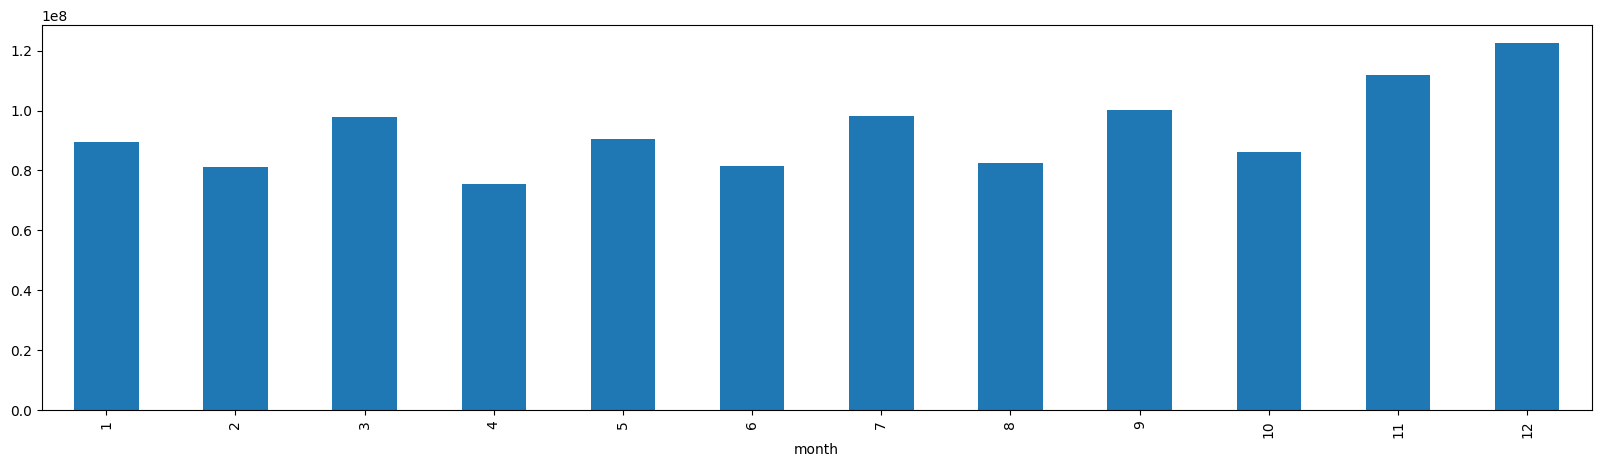

In [25]:
plt.figure(figsize=(20, 5))
data.groupby(["month"])['VlrAPagar'].sum().plot.bar()

<Axes: xlabel='date'>

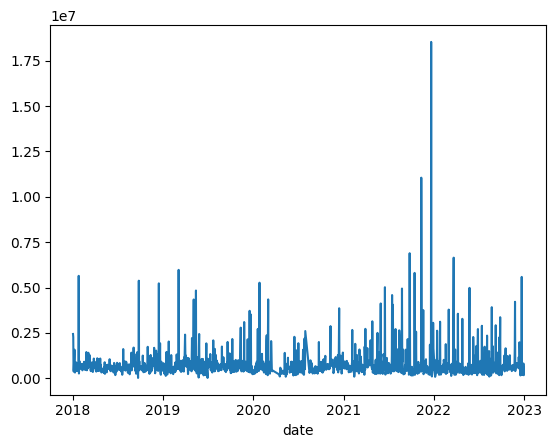

In [26]:
data.groupby(["date"])['VlrAPagar'].sum().plot()

#### Los productos mas vendidos teniendo en cuenta la cantidad

<Axes: xlabel='Producto'>

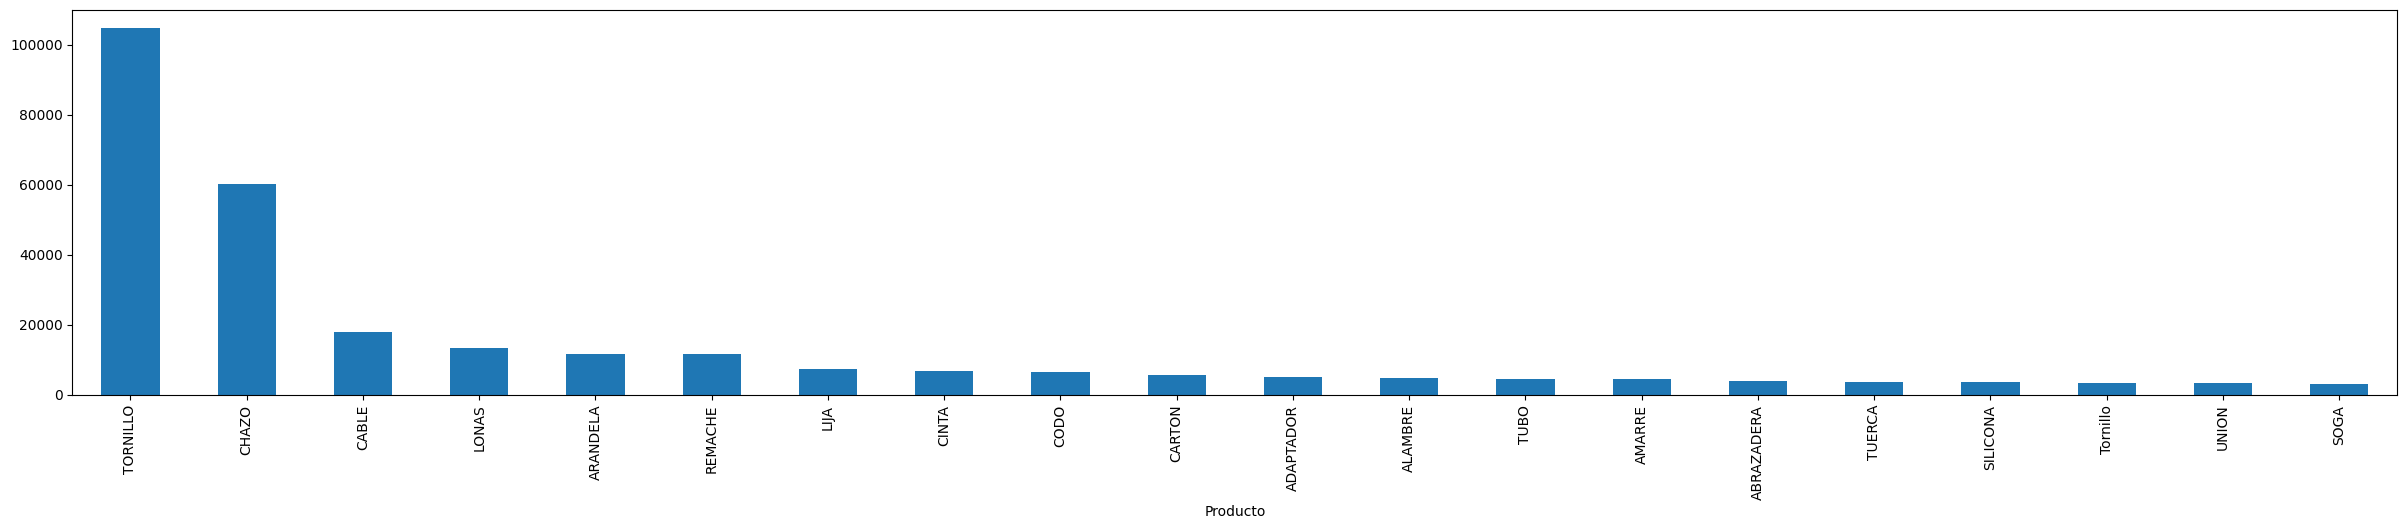

In [27]:
plt.figure(figsize=(30, 5))
data.groupby(["Producto"])['Cantidad'].sum().sort_values(ascending=False).head(20).plot.bar()

#### Los productos que mas se compran

<Axes: xlabel='Producto'>

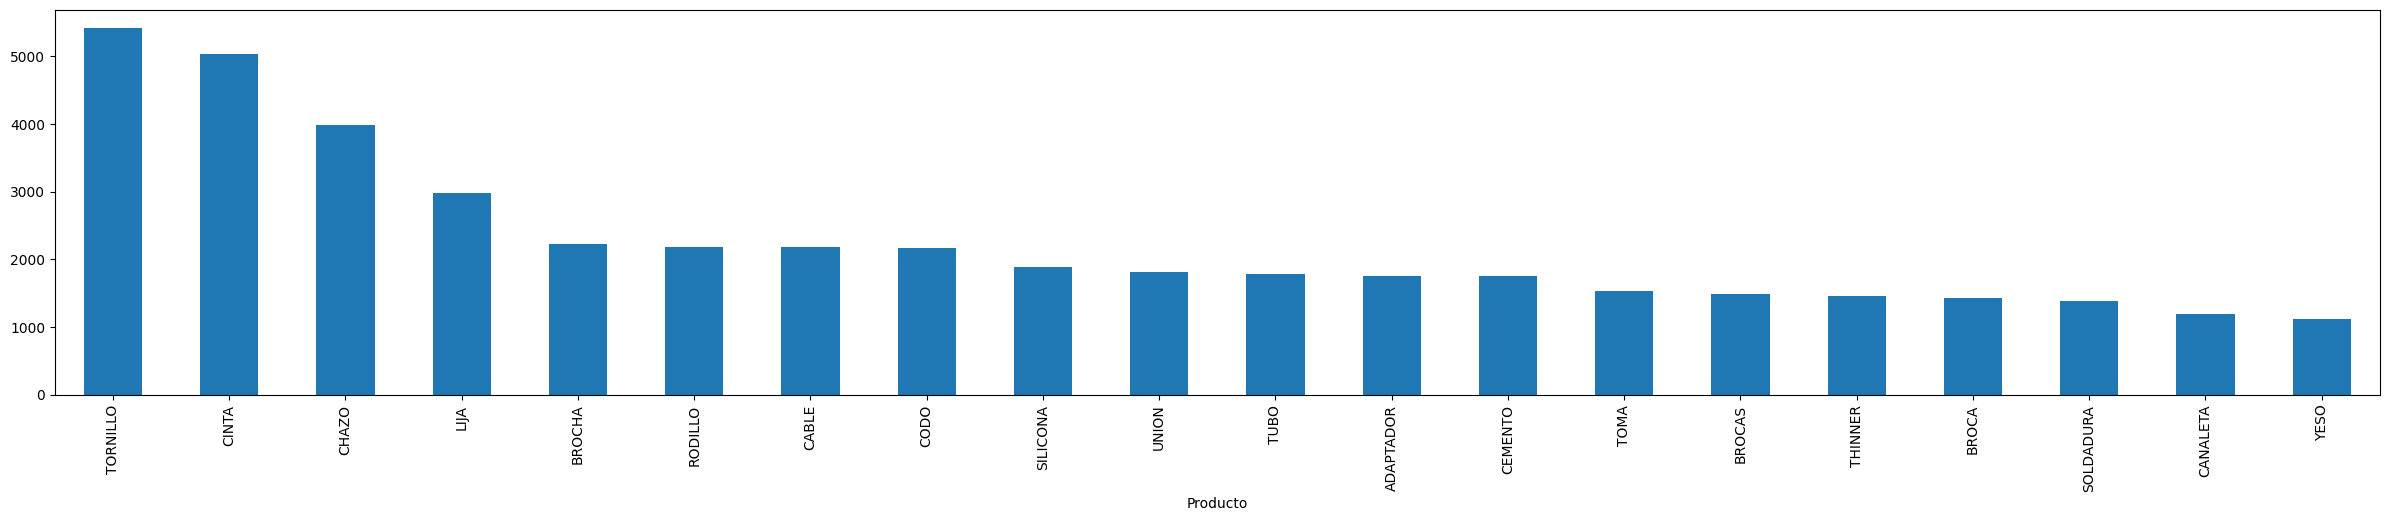

In [28]:
plt.figure(figsize=(30, 5))
prod = pd.DataFrame({'date': data['date'], 'Producto': data['Producto'], 'cantidad': 1})
prod.groupby(["Producto"])['cantidad'].sum().sort_values(ascending=False).head(20).plot.bar()

#### Valor agrupado por fecha y sumando el valor total

In [29]:
daily = data.groupby(["date"])['VlrAPagar'].sum().to_frame().sort_values(by='date', ascending=True)
daily = daily[daily['VlrAPagar'] < 1200000]
daily

,VlrAPagar
date,
2018-01-05,453500.000000
2018-01-06,364500.000000
2018-01-10,660199.999996
2018-01-11,315350.000000
2018-01-12,575300.000000
...,...
2022-12-27,788600.000000
2022-12-28,396100.000000
2022-12-29,813500.000000


#### Teniendo en cuenta la fecha como indice

In [30]:
daily.index

Index([2018-01-05, 2018-01-06, 2018-01-10, 2018-01-11, 2018-01-12, 2018-01-13,
       2018-01-15, 2018-01-16, 2018-01-17, 2018-01-18,
       ...
       2022-12-20, 2022-12-21, 2022-12-23, 2022-12-24, 2022-12-26, 2022-12-27,
       2022-12-28, 2022-12-29, 2022-12-30, 2022-12-31],
      dtype='object', name='date', length=1292)

#### Agregamos los campos al nuevo DF

In [31]:
daily.index = pd.to_datetime(daily.index)
daily['year'] = daily.index.strftime('%Y')
daily['month'] = daily.index.strftime('%m')
daily['weekday'] = daily.index.strftime('%w')
daily['day'] = daily.index.strftime('%-d')
daily = daily[daily['weekday'] != 0]
daily

,VlrAPagar,year,month,weekday,day
date,,,,,
2018-01-05,453500.000000,2018,01,5,5
2018-01-06,364500.000000,2018,01,6,6
2018-01-10,660199.999996,2018,01,3,10
2018-01-11,315350.000000,2018,01,4,11
2018-01-12,575300.000000,2018,01,5,12
...,...,...,...,...,...
2022-12-27,788600.000000,2022,12,2,27
2022-12-28,396100.000000,2022,12,3,28
2022-12-29,813500.000000,2022,12,4,29


#### Separamos nuestros datos

In [32]:
from sklearn.model_selection import train_test_split


y = daily["VlrAPagar"]
X = daily.drop(columns='VlrAPagar')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [33]:
X_train

,year,month,weekday,day
date,,,,
2018-01-05,2018,01,5,5
2018-01-06,2018,01,6,6
2018-01-10,2018,01,3,10
2018-01-11,2018,01,4,11
2018-01-12,2018,01,5,12
...,...,...,...,...
2021-06-18,2021,06,5,18
2021-06-19,2021,06,6,19
2021-06-21,2021,06,1,21


In [34]:
y_train

date
2018-01-05    453500.000000
2018-01-06    364500.000000
2018-01-10    660199.999996
2018-01-11    315350.000000
2018-01-12    575300.000000
                  ...      
2021-06-18    514600.000000
2021-06-19    201600.000167
2021-06-21    352200.000000
2021-06-22    307700.000000
2021-06-23    528400.000000
Name: VlrAPagar, Length: 904, dtype: float64

#### Entrenamos el modelo

In [35]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='if_binary', handle_unknown='ignore' ), 
         ['year', 'weekday', 'month', 'day']),
    ),
    RandomForestRegressor()
)

model.fit(X_train, y_train);

#### Vemos su comportamiento con los datos de entrenamiento

67783.40154513282

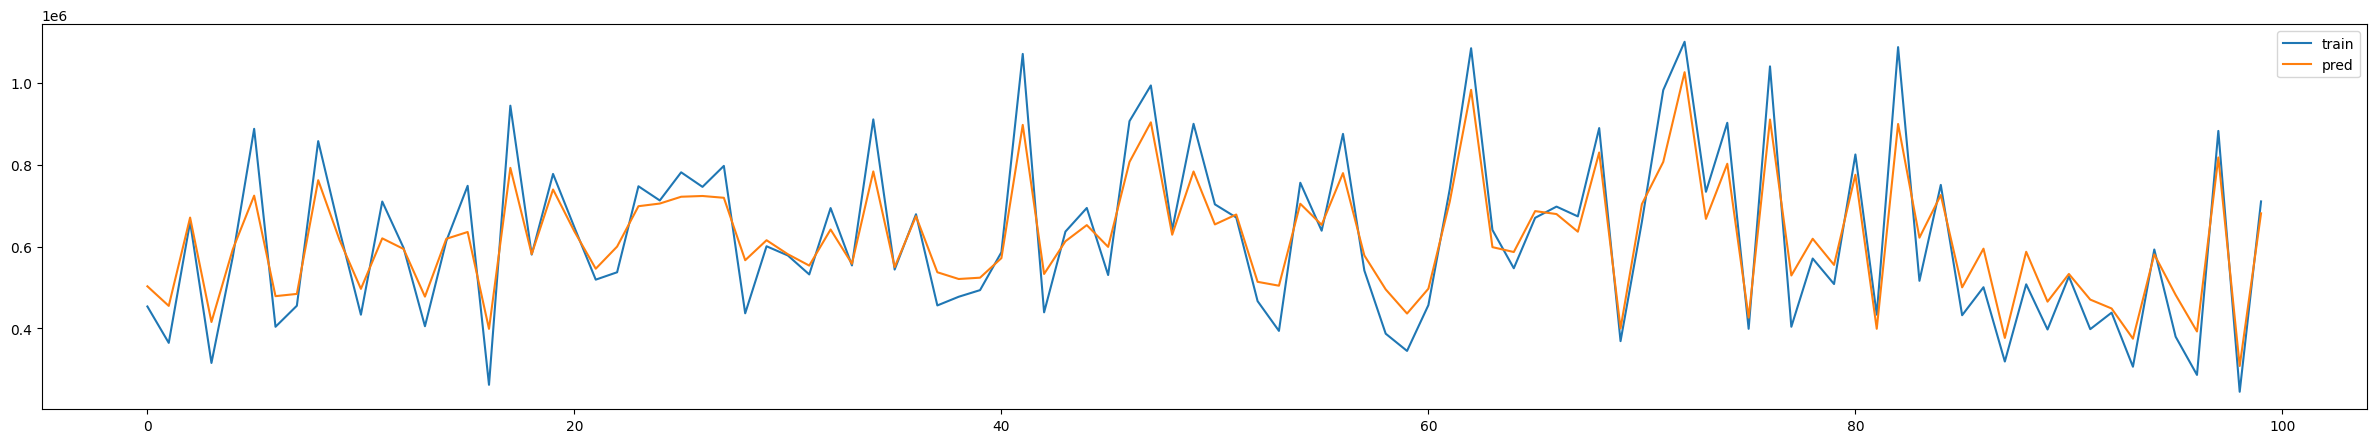

In [36]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_train)
plt.figure(figsize=(30, 5))
plt.plot(y_train[:100].values, label="train")
plt.plot(y_pred[:100], label="pred")
plt.legend()
mean_absolute_error(y_train, y_pred)

#### Y con los datos de prueba

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


212198.7284652723

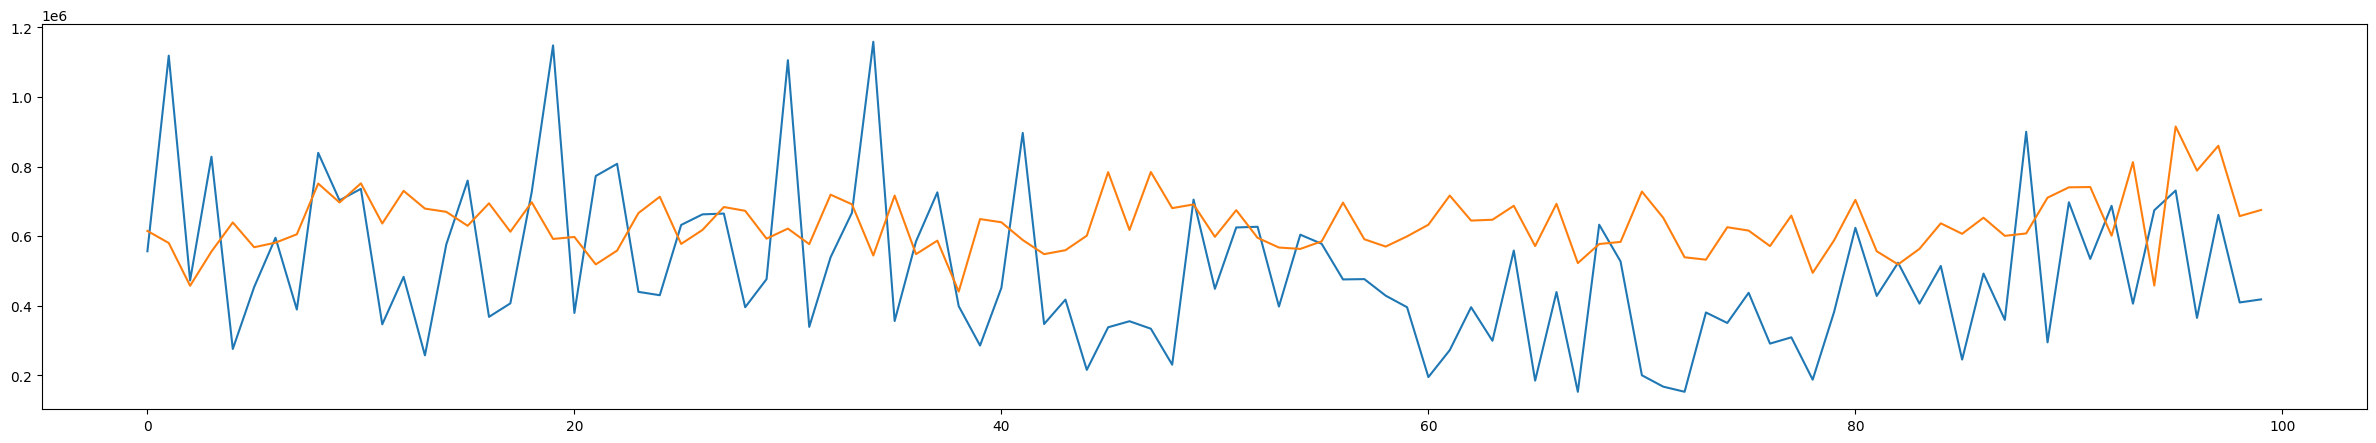

In [37]:
y_pred = model.predict(X_test)
plt.figure(figsize=(30, 5))
plt.plot(y_test[:100].values)
plt.plot(y_pred[:100])

mean_absolute_error(y_test, y_pred)

#### Vemos el rendimiento del modelo

In [38]:
from sklearn.model_selection import cross_validate, TimeSeriesSplit,cross_val_score

cv = TimeSeriesSplit(n_splits=10, )

scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=cv)

f"MAE = {-scores.mean():0.2f} +/- {scores.std():0.2f}"

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown

'MAE = 199757.65 +/- 23438.93'

In [72]:
info = data.groupby(['date', 'hour'])['VlrAPagar'].sum().reset_index()
info['value'] = info['VlrAPagar']
info = info.drop('VlrAPagar', axis=1)
info['date'] = pd.to_datetime(info['date'])
info['hour'] = pd.to_datetime(info['hour'], format='%H').dt.time
info['datetime'] = pd.to_datetime(info['date'].dt.strftime('%Y-%m-%d') + ' ' + info['hour'].astype(str))
info = info.set_index("datetime")
info['year'] = info.index.strftime('%Y')
info['month'] = info.index.strftime('%m')
info['weekday'] = info.index.strftime('%w')
info['day'] = info.index.strftime('%-d')
info

,date,hour,value,year,month,weekday,day
datetime,,,,,,,
2018-01-03 00:00:00,2018-01-03,00:00:00,1845000.0,2018,01,3,3
2018-01-03 08:00:00,2018-01-03,08:00:00,1000.0,2018,01,3,3
2018-01-03 09:00:00,2018-01-03,09:00:00,184250.0,2018,01,3,3
2018-01-03 10:00:00,2018-01-03,10:00:00,49800.0,2018,01,3,3
2018-01-03 11:00:00,2018-01-03,11:00:00,50700.0,2018,01,3,3
...,...,...,...,...,...,...,...
2022-12-30 14:00:00,2022-12-30,14:00:00,11600.0,2022,12,5,30
2022-12-31 09:00:00,2022-12-31,09:00:00,384100.0,2022,12,6,31
2022-12-31 10:00:00,2022-12-31,10:00:00,85200.0,2022,12,6,31


In [73]:
from sklearn.model_selection import train_test_split


y = info["value"]
X = info.drop(columns="value")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [79]:
y.dtypes

dtype('float64')

In [80]:
X_train['dia_anterior'] = y_train.shift(1, freq="d")
X_test['dia_anterior'] = y_test.shift(1, freq="d")

X_train['semana_anterior'] = y_train.shift(7, freq="d")
X_test['semana_anterior'] = y_test.shift(7, freq="d")

In [81]:
X_train

,date,hour,year,month,weekday,day,dia_anterior,semana_anterior
datetime,,,,,,,,
2018-01-03 00:00:00,2018-01-03,00:00:00,2018,01,3,3,NaN,NaN
2018-01-03 08:00:00,2018-01-03,08:00:00,2018,01,3,3,NaN,NaN
2018-01-03 09:00:00,2018-01-03,09:00:00,2018,01,3,3,NaN,NaN
2018-01-03 10:00:00,2018-01-03,10:00:00,2018,01,3,3,NaN,NaN
2018-01-03 11:00:00,2018-01-03,11:00:00,2018,01,3,3,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-04-29 09:00:00,2021-04-29,09:00:00,2021,04,4,29,NaN,39200.0
2021-04-29 10:00:00,2021-04-29,10:00:00,2021,04,4,29,139400.0,65000.0
2021-04-29 11:00:00,2021-04-29,11:00:00,2021,04,4,29,395900.0,96000.0


In [82]:
pd.concat([X_train, y_train], axis=1).tail(25)

,date,hour,year,month,weekday,day,dia_anterior,semana_anterior,value
datetime,,,,,,,,,
2021-04-26 16:00:00,2021-04-26,16:00:00,2021,04,1,26,NaN,34000.0,3.580000e+04
2021-04-26 17:00:00,2021-04-26,17:00:00,2021,04,1,26,NaN,19300.0,1.370000e+04
2021-04-27 08:00:00,2021-04-27,08:00:00,2021,04,2,27,147700.000000,33500.0,8.950000e+04
2021-04-27 09:00:00,2021-04-27,09:00:00,2021,04,2,27,86000.000000,368410.0,8.770000e+04
2021-04-27 10:00:00,2021-04-27,10:00:00,2021,04,2,27,2600.000000,29600.0,2.000000e+04
2021-04-27 11:00:00,2021-04-27,11:00:00,2021,04,2,27,41200.000000,83000.0,7.600000e+03
2021-04-27 12:00:00,2021-04-27,12:00:00,2021,04,2,27,NaN,53700.0,8.850000e+04
2021-04-27 13:00:00,2021-04-27,13:00:00,2021,04,2,27,114400.000000,9200.0,4.850000e+04
2021-04-27 14:00:00,2021-04-27,14:00:00,2021,04,2,27,57000.000000,5000.0,7.860000e+04


In [106]:
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.impute import SimpleImputer, KNNImputer


regressor = TransformedTargetRegressor(SVR(), func=np.log, inverse_func=np.exp)

model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(drop='if_binary', handle_unknown='ignore' ), ['weekday', 'month', 'hour', 'day']),
        (MinMaxScaler(), ['dia_anterior', 'semana_anterior']),
        sparse_threshold=0
    ),
    KNNImputer(),
    RandomForestRegressor()
)

model.fit(X_train, y_train);

In [107]:
cv = TimeSeriesSplit(n_splits=10,  )

scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=cv)

f"MAE = {-scores.mean():0.2f} +/- {scores.std():0.2f}"

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


'MAE = 71761.74 +/- 7774.15'

26335.994705225155

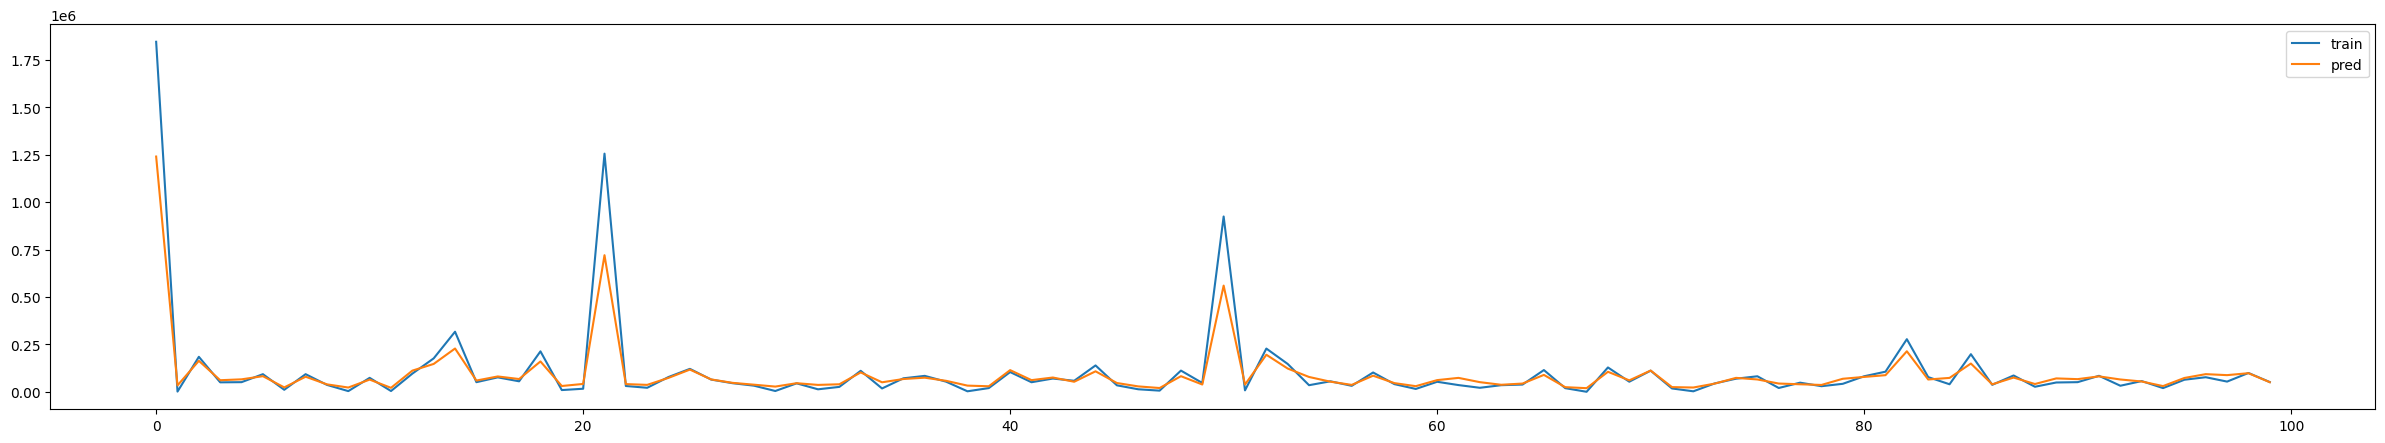

In [112]:
y_pred = model.predict(X_train)
plt.figure(figsize=(30, 5))
plt.plot(y_train[:100].values, label="train")
plt.plot(y_pred[:100], label="pred")
plt.legend()
mean_absolute_error(y_train, y_pred)

103542.41796902007

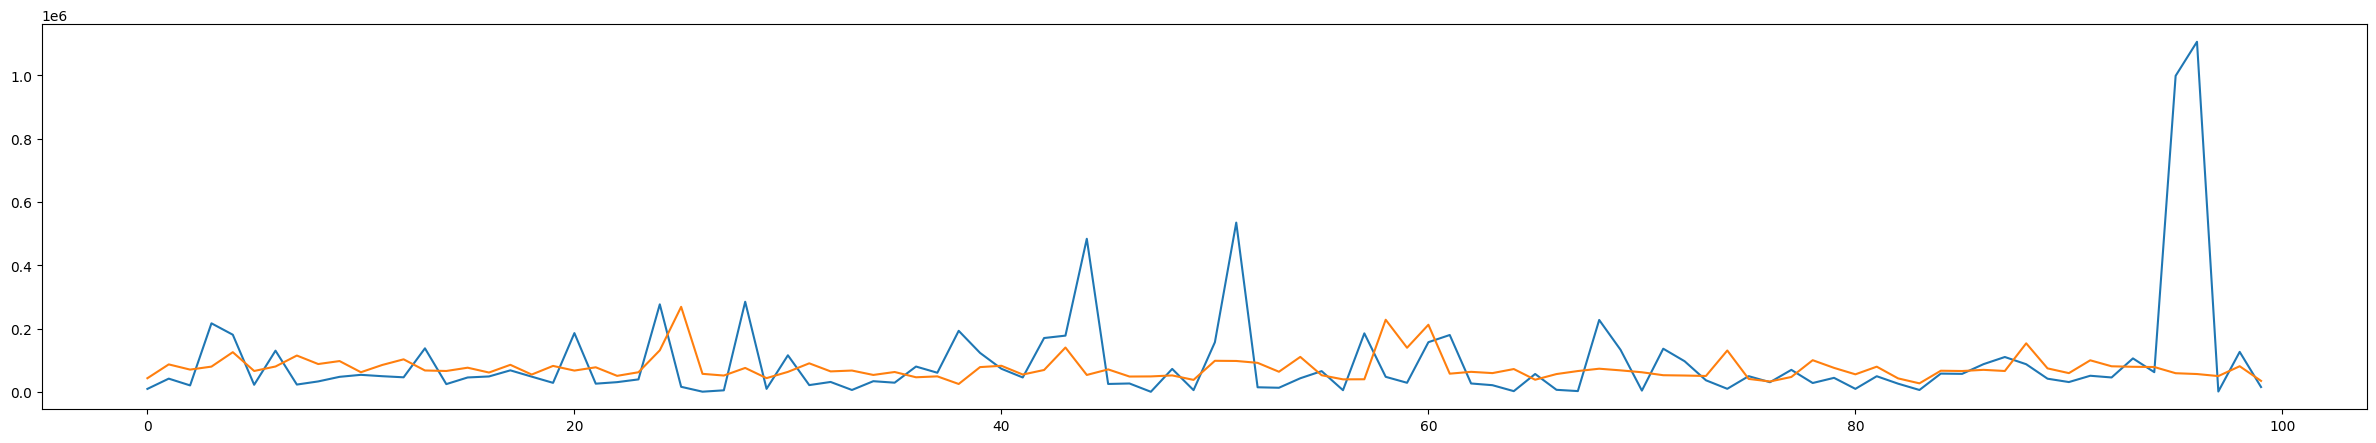

In [111]:
y_pred = model.predict(X_test)
plt.figure(figsize=(30, 5))
plt.plot(y_test[:100].values)
plt.plot(y_pred[:100])

mean_absolute_error(y_test, y_pred)

#### Ahora utilizaremos Prophet

In [87]:
from prophet import Prophet
daily['y'] = daily['VlrAPagar']
daily['ds'] = daily.index
daily=daily.reset_index()[['ds','y']]
daily

,ds,y
0,2018-01-05,453500.000000
1,2018-01-06,364500.000000
2,2018-01-10,660199.999996
3,2018-01-11,315350.000000
4,2018-01-12,575300.000000
...,...,...
1287,2022-12-27,788600.000000
1288,2022-12-28,396100.000000
1289,2022-12-29,813500.000000
1290,2022-12-30,168000.000000


#### Separamos la informacion

In [88]:
train, test = train_test_split(daily, test_size=0.3, shuffle=False)
train

,ds,y
0,2018-01-05,453500.000000
1,2018-01-06,364500.000000
2,2018-01-10,660199.999996
3,2018-01-11,315350.000000
4,2018-01-12,575300.000000
...,...,...
899,2021-06-18,514600.000000
900,2021-06-19,201600.000167
901,2021-06-21,352200.000000
902,2021-06-22,307700.000000


<Axes: xlabel='ds'>

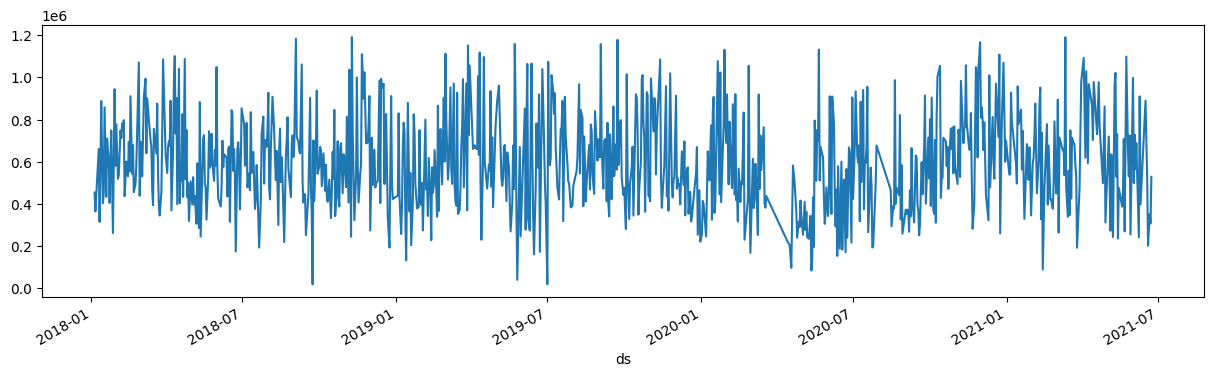

In [89]:
train.set_index("ds")['y'].plot(figsize=(15,4))

#### Entrenamos el modelo

In [90]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz05fzcbl/7gjdtm7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz05fzcbl/k88knckj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35719', 'data', 'file=/tmp/tmpz05fzcbl/7gjdtm7q.json', 'init=/tmp/tmpz05fzcbl/k88knckj.json', 'output', 'file=/tmp/tmpz05fzcbl/prophet_model07rhbtsg/prophet_model-20230519203033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:30:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### Lo Ponemos a prueba

In [91]:
forecast = m.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
383,2022-12-27,608220.652956,313372.641798,875233.321486
384,2022-12-28,618406.210855,348649.071192,880814.559809
385,2022-12-29,564611.524991,280530.492491,851452.137781
386,2022-12-30,562578.246601,294650.475954,845912.050406
387,2022-12-31,489700.582265,211252.875780,773826.746484


#### Medimos su desempeño

In [92]:
mean_absolute_error(test["y"], forecast["yhat"])

208499.22389594666

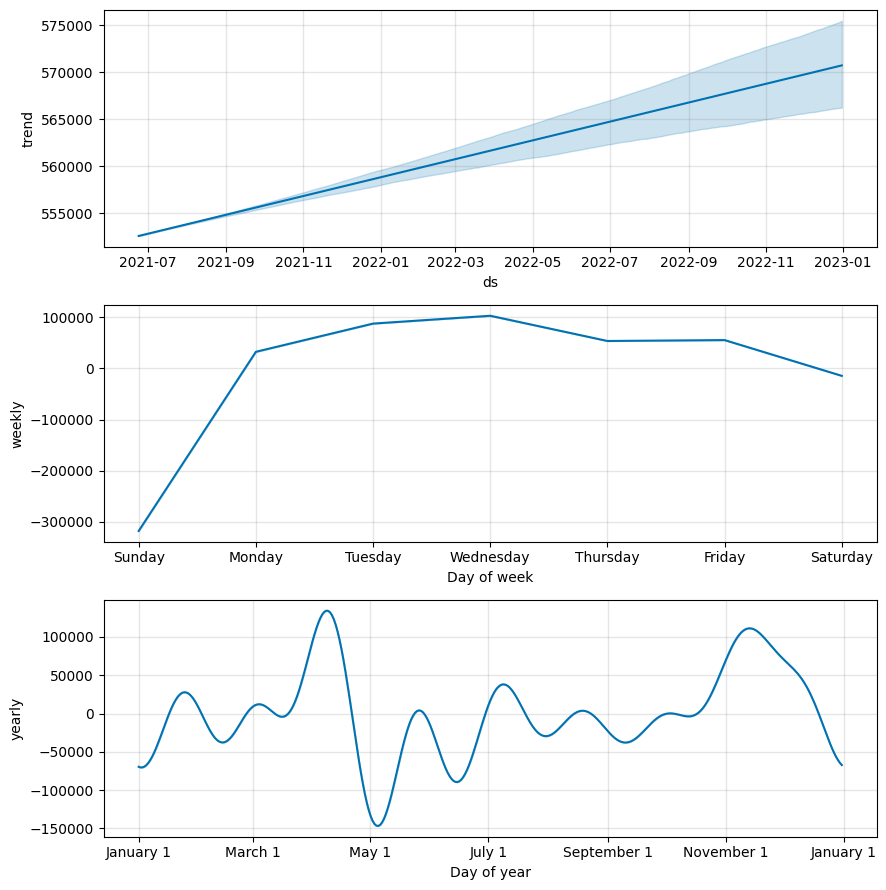

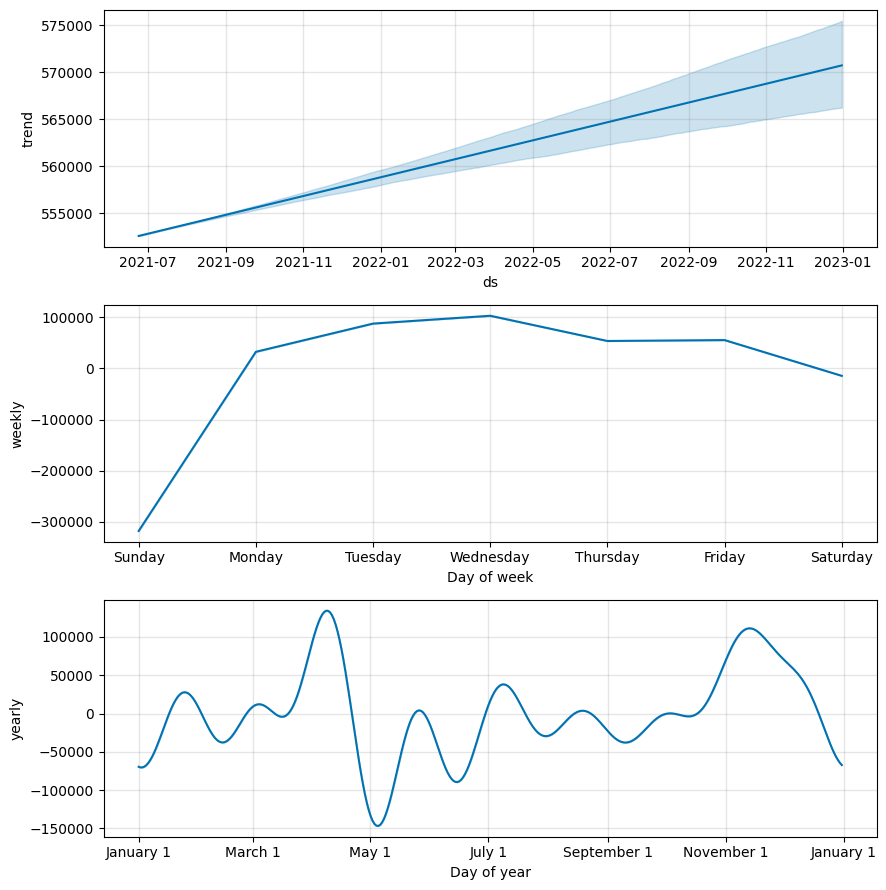

In [93]:
m.plot_components(forecast)

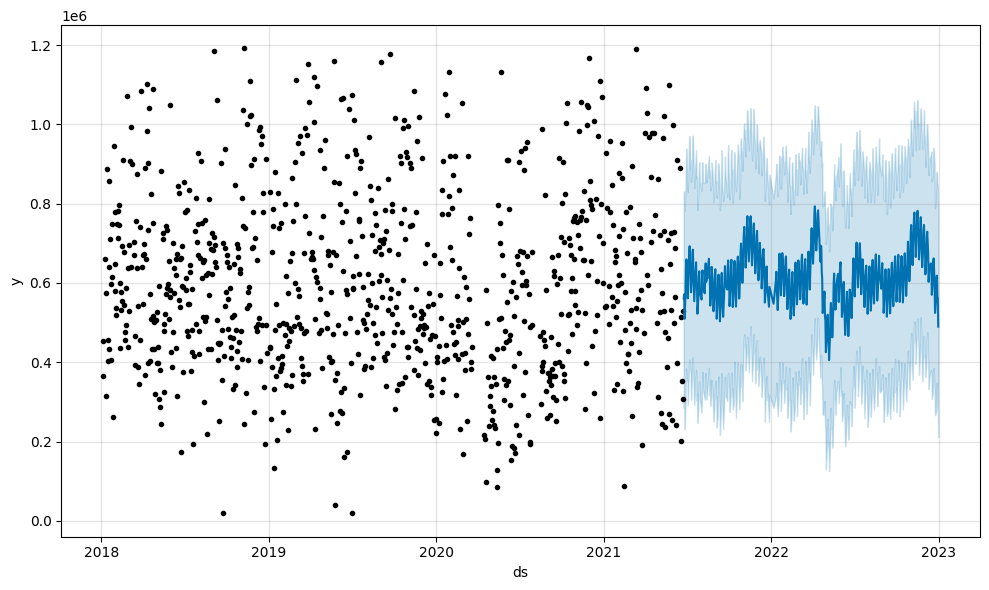

In [94]:
fig1 = m.plot(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz05fzcbl/hxykt9x4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz05fzcbl/o4ijsvdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75896', 'data', 'file=/tmp/tmpz05fzcbl/hxykt9x4.json', 'init=/tmp/tmpz05fzcbl/o4ijsvdb.json', 'output', 'file=/tmp/tmpz05fzcbl/prophet_modelze3zk4qk/prophet_model-20230519215100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:51:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:51:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


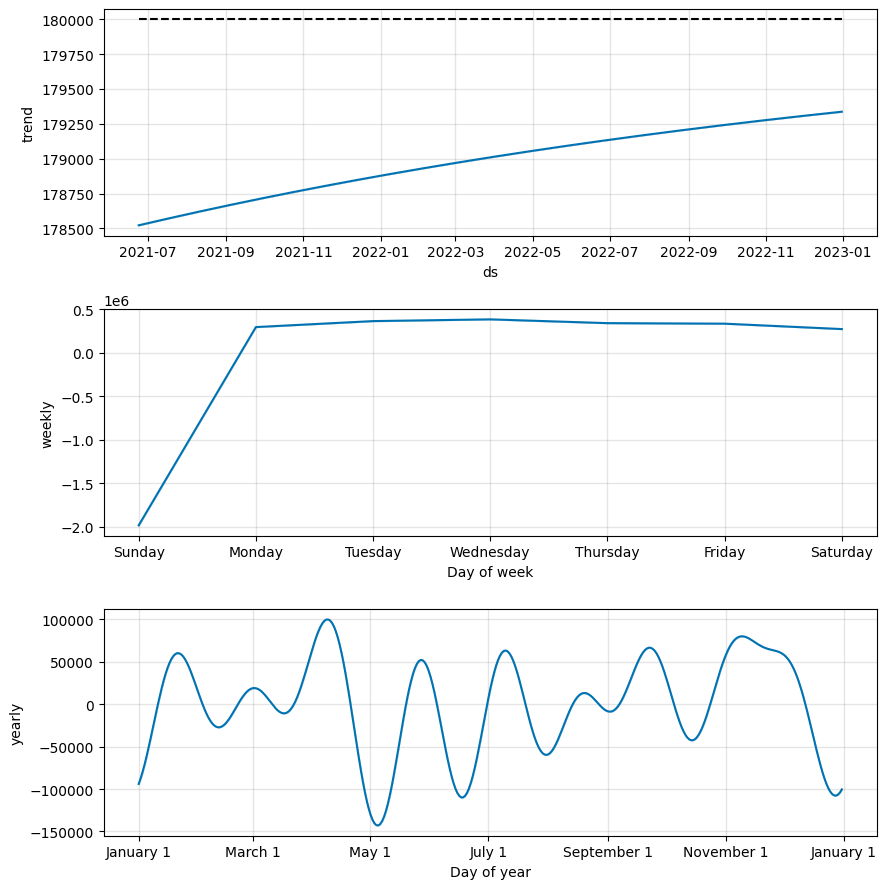

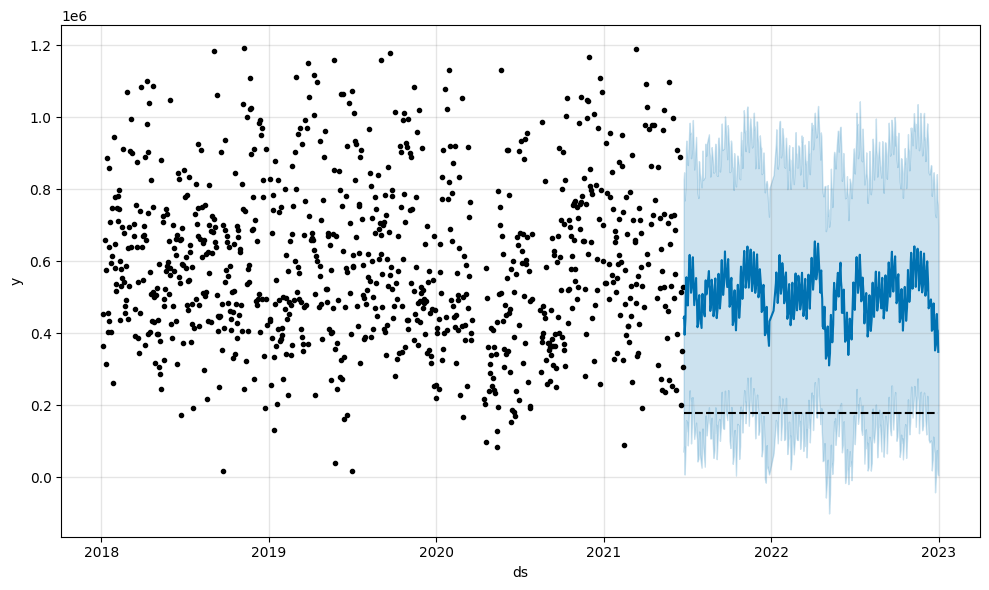

In [119]:
m = Prophet(growth="logistic")
train["cap"] = 180000
m.fit(train)

test["cap"] = 180000
forecast = m.predict(test)

m.plot_components(forecast)
m.plot(forecast);

In [120]:
mean_absolute_error(test["y"], forecast["yhat"])

181824.71788685123

#### El comportamiento erratico de las ventas y habiendo filtrado aquellos picos y datos atipicos, el modelo no obtiene un buen resultado. Por lo que no es posible evidenciar que sea el mejor modelo a implementar.

## Referencias



*   **H. Smolic. (2022)**. *Sales Forecasting: How to Apply Machine Learning* Graphite.
  * https://graphite-note.com/machine-learning-sales-forecasting#:~:text=Machine%20learning%2Ddriven%20sales%20forecasting,accurate%20predictions%20about%20future%20sales.

*  **Bohdan M.,(2019).** *Machine-Learning Models for Sales Time Series Forecasting* MDPI.
  *  https://www.mdpi.com/2306-5729/4/1/15


*  **Ajitesh Kumar. (2022)**. *Classification Problems Real-life Examples* 
  *  https://vitalflux.com/classification-problems-real-world-examples/.


